1. Understand the problem and read in the data
2. Pre-process data, train-test split
3. Build and compile a deep learning model

# Understand the problem and read in the data

This Kaggle challenge is about predicting the onset of diabetes in 5 years or less. 
Target variable is Outcome. 1 = yes, the person became diabetic in 5 years, and 0 = No, 
the person did not. This is a binary classification problem. Please check out the Kaggle
link here to see feature 
details - https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [1]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

Using TensorFlow backend.


In [2]:
%pwd

'C:\\Users\\shrey\\Desktop\\MLAsg3'

In [3]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
path = 'C:\\Users\\shrey\\Desktop\\MLAsg3'

In [5]:
df = pd.read_csv(f'{path}\pima-indians-diabetes.data',header = None)
print(df.shape)
df.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [6]:


corr = df.corr()
corr






,0,1,2,3,4,5,6,7,8
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
8,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


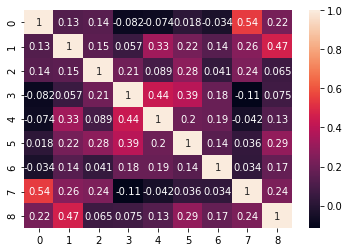

In [7]:

%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

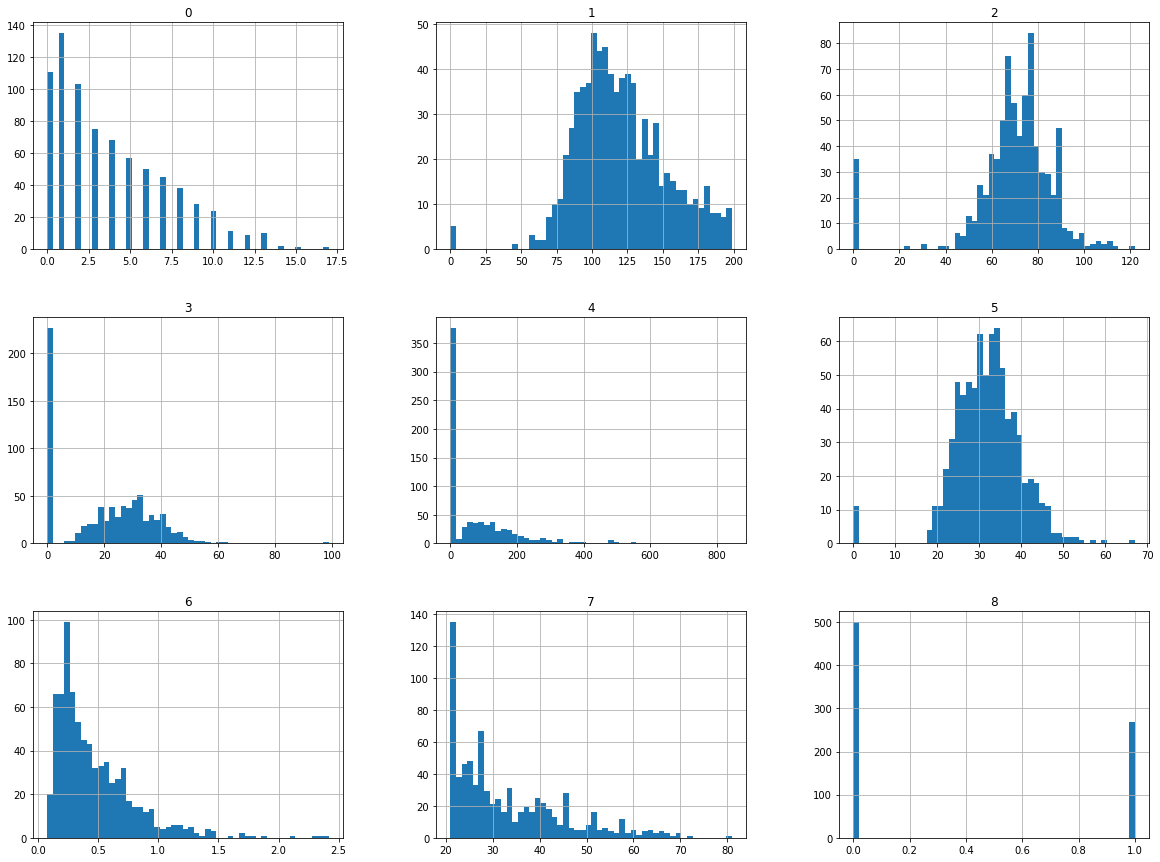

In [8]:


import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()



# Pre-process data, train-valid-test split

In [9]:
# Calculate the median value for BMI
median_bmi = df[5].median()
# Substitute it in the BMI column of the
# dataset where values are 0
df[5] = df[5].replace(to_replace=0, value=median_bmi)


In [10]:
df[5].median()

32.0

In [11]:
df[5][9] #Null value replaced by Median

32.0

In [12]:


# Calculate the median value for BloodP
median_bloodp = df[2].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
df[2] = df[2].replace(to_replace=0, value=median_bloodp)



In [13]:


# Calculate the median value for PlGlcConc
median_plglcconc = df[1].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
df[1] = df[1].replace(to_replace=0, value=median_plglcconc)





In [14]:
# Calculate the median value for SkinThick
median_skinthick = df[3].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
df[3] = df[3].replace(to_replace=0, value=median_skinthick)



In [15]:
# Calculate the median value for TwoHourSerIns
median_twohourserins = df[4].median()
# Substitute it in the TwoHourSerIns column of the
# dataset where values are 0
df[4] = df[4].replace(to_replace=0, value=median_twohourserins)

In [16]:
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Feature Scaling

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [18]:
# Apply a scaler
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(df)
df_scaled = scaler.transform(df)




In [19]:
df_new= pd.DataFrame(data=df_scaled)
df_new.head()


,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [20]:
'''#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_std=sc.fit_transform(df_new)
df_std_new= pd.DataFrame(data=df_std)
df_std_new.head()'''

'#Standardization\nfrom sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\ndf_std=sc.fit_transform(df_new)\ndf_std_new= pd.DataFrame(data=df_std)\ndf_std_new.head()'

#### "Standardization" typically means that the range of values are "standardized" to measure how many standard deviations the value is from its mean. However, not everyone would agree with that.

In [21]:
#Separate out X and Y

X = df_new.iloc[:, :8]
Y = df_new.iloc[:, 8:9]

In [22]:
# Train- Test Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.33, random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(514, 8) (254, 8) (514, 1) (254, 1)


In [23]:
# Train- valid Split
(X_train_new, X_valid, Y_train_new, Y_valid) = train_test_split(X_train, Y_train, test_size=0.20, random_state=1)
print(X_train_new.shape, X_valid.shape, X_test.shape, Y_train_new.shape,Y_valid.shape,Y_test.shape)

(411, 8) (103, 8) (254, 8) (411, 1) (103, 1) (254, 1)


In [24]:
X_train_new

,0,1,2,3,4,5,6,7
5,0.294118,0.464516,0.510204,0.173913,0.019832,0.151329,0.052519,0.150000
39,0.235294,0.432258,0.489796,0.434783,0.231971,0.386503,0.560205,0.583333
615,0.176471,0.400000,0.489796,0.173913,0.019832,0.155419,0.055081,0.100000
695,0.411765,0.632258,0.673469,0.184783,0.560096,0.249489,0.021349,0.366667
77,0.294118,0.329032,0.489796,0.282609,0.019832,0.398773,0.124680,0.100000
158,0.117647,0.283871,0.510204,0.130435,0.046875,0.220859,0.064475,0.016667
586,0.470588,0.638710,0.428571,0.173913,0.019832,0.341513,0.021776,0.333333
220,0.000000,0.858065,0.367347,0.239130,0.557692,0.335378,0.424424,0.000000
328,0.117647,0.374194,0.632653,0.315217,0.127404,0.558282,0.020922,0.033333
423,0.117647,0.458065,0.408163,0.163043,0.019832,0.257669,0.146456,0.000000


# Build and compile a deep learning model

In [58]:
# Build the deep neural network
from tensorflow.contrib import keras
from keras import models, layers, losses, optimizers, metrics

model = Sequential()
model.add(Dense(10, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))


# Hyperparameters
hold_prob = 0.0
beta = 1e-6
alpha = 0.001
lr_decay = 0.01
iterations = 1000
validation_split = 0.5
opt_momentum = 0.8 # (Use only for SGD)

#Setting Optimizer


#opt = optimizers.SGD(lr=alpha, decay=lr_decay)



C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=8, activation="relu", kernel_initializer="uniform")`
  
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [59]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [60]:
# Fit the DNN with your train data

history=model.fit(X_train_new, Y_train_new, validation_data=(X_valid, Y_valid), nb_epoch=100, batch_size=10, verbose= 2)

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 411 samples, validate on 103 samples
Epoch 1/100
 - 0s - loss: 0.6907 - acc: 0.6667 - val_loss: 0.6888 - val_acc: 0.6311
Epoch 2/100
 - 0s - loss: 0.6847 - acc: 0.6642 - val_loss: 0.6833 - val_acc: 0.6311
Epoch 3/100
 - 0s - loss: 0.6763 - acc: 0.6642 - val_loss: 0.6756 - val_acc: 0.6311
Epoch 4/100
 - 0s - loss: 0.6629 - acc: 0.6642 - val_loss: 0.6671 - val_acc: 0.6311
Epoch 5/100
 - 0s - loss: 0.6512 - acc: 0.6642 - val_loss: 0.6628 - val_acc: 0.6311
Epoch 6/100
 - 0s - loss: 0.6463 - acc: 0.6642 - val_loss: 0.6597 - val_acc: 0.6311
Epoch 7/100
 - 0s - loss: 0.6413 - acc: 0.6642 - val_loss: 0.6569 - val_acc: 0.6311
Epoch 8/100
 - 0s - loss: 0.6373 - acc: 0.6642 - val_loss: 0.6512 - val_acc: 0.6311
Epoch 9/100
 - 0s - loss: 0.6314 - acc: 0.6642 - val_loss: 0.6459 - val_acc: 0.6311
Epoch 10/100
 - 0s - loss: 0.6241 - acc: 0.6642 - val_loss: 0.6394 - val_acc: 0.6311
Epoch 11/100
 - 0s - loss: 0.6172 - acc: 0.6642 - val_loss: 0.6290 - val_acc: 0.6311
Epoch 12/100
 - 0s - loss: 0

Epoch 97/100
 - 0s - loss: 0.4774 - acc: 0.7689 - val_loss: 0.5213 - val_acc: 0.7282
Epoch 98/100
 - 0s - loss: 0.4782 - acc: 0.7616 - val_loss: 0.5225 - val_acc: 0.7184
Epoch 99/100
 - 0s - loss: 0.4783 - acc: 0.7543 - val_loss: 0.5211 - val_acc: 0.7282
Epoch 100/100
 - 0s - loss: 0.4774 - acc: 0.7713 - val_loss: 0.5213 - val_acc: 0.7282


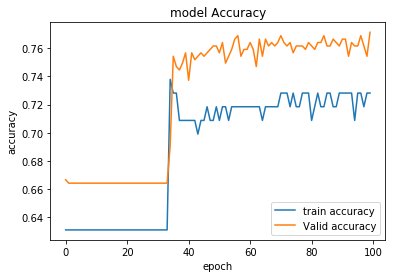

In [66]:


# Make Epoch versus train set accuracy,and validation set accuracy
plt.figure()

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'Valid accuracy'], loc='lower right')
plt.show()



In [67]:
# Evaluate the model
scores = model.evaluate(X_valid, Y_valid,  batch_size=5, verbose=1)
print ("Accuracy: %.2f%%" %(scores[1]*100))

103/103 [==============================] - 0s 77us/step
Accuracy: 72.82%


In [68]:
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

254/254 [==============================] - 0s 16us/step
Accuracy: 77.56%


In [69]:
#Predict on test set
predictions_NN_prob = model.predict(X_test)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

In [70]:
acc_NN = accuracy_score(Y_test, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.7755905511811023


# Using model.evaluate and accuracy_score , the accuracy of Test set is ~= 77.57

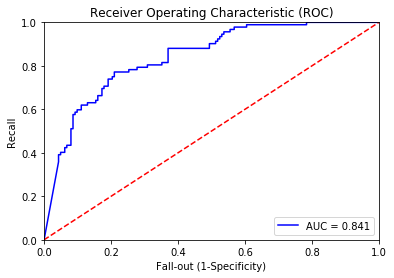

In [73]:
#Print Area Under Curve ROC/AUC,reporting AUC values
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

false_positive_rate, recall, thresholds = roc_curve(Y_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()



# AUC is 0.841 or 84.1%